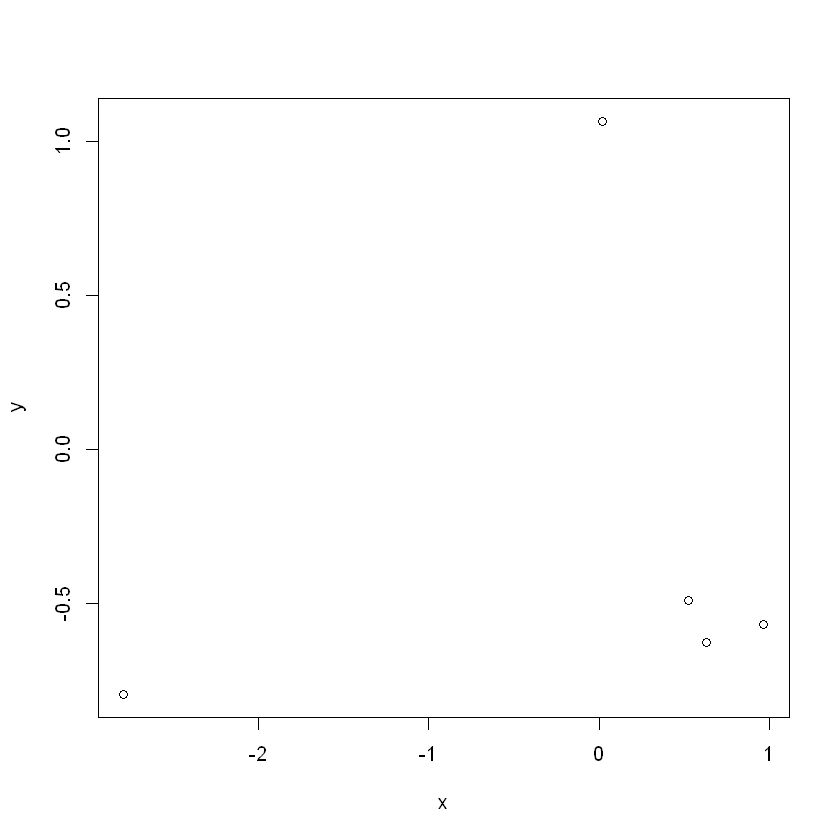

In [7]:
x<-rnorm(5)
y<-rnorm(5)
plot(x,y)

In [14]:
getwd()
ls()
options()
history()

[1] "E:/code/R"

[1] "x" "y"

$add.smooth
[1] TRUE

$browserNLdisabled
[1] FALSE

$CBoundsCheck
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  
[7] "RevoUtils"

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (filename = null_filename, ...) 
ok_device(filename, ...)
<environment: 0x0000000014103ba8>

$device.ask.default
[1] FALSE

$digits
[1] 7

$echo
[1] FALSE

$editor
[1] "notepad"

$encoding
[1] "native.enc"

$example.ask
[1] "default"

$expressions
[1] 5000

$help.search.types
[1] "vignette" "demo"     "help"    

$help.try.all.packages
[1] FALSE

$help_type
[1] "html"

$HTTPUserAgent
[1] "R (3.4.3 x86_64-w64-mingw32 x86_64 mingw32)"

$install.packages.compile.from.source
[1] "interactive"

$internet.info
[1] 2

$jupyter.base_display_func
function (data, metadata = NULL) 
{
    if (is.null(metadata)) {
        metadata <- namedlist()
    }
    send_response("display_data", current_request, "iopub", list(source = "R display func", 
        data = data, metadata = metadata))
    invisible(TRUE)
}
<environment: 0x0000000013f39d68>
attr(,"mayCall")
character(0)
attr(,"name")
[1] "display_data"
attr(,"refClassName")
[1] "Executor"
attr(,"superClassMethod")
[1] ""
attr(,"class")
[1] "refMethodDef"
attr(,"class")attr(,"package")
[1] "methods"

$jupyter.display_mimetypes
 [1] "text/plain"             "text/html"              "text/markdown"         
 [4] "text/latex"             "application/json"       "application/javascript"
 [7] "application/pdf"        "image/png"              "image/jpeg"            
[10] "image/svg+xml"         

$jupyter.in_kernel
[1] TRUE

$jupyter.log_level
[1] 1

$jupyter.logfile
[1] NA

$jupyter.pager_classes
[1] "packageIQR"            "help_files_with_topic"

$jupyter.plot_mimetypes
[1] "text/plain" "image/png" 

$jupyter.rich_display
[1] TRUE

$keep.source
[1] FALSE

$keep.source.pkgs
[1] FALSE

$locatorBell
[1] TRUE

$mailer
[1] "mailto"

$matprod
[1] "default"

$max.print
[1] 99999

$menu.graphics
[1] TRUE

$na.action
[1] "na.omit"

$nwarnings
[1] 50

$OutDec
[1] "."

$pager
function (files, header, title, delete.file) 
{
    text <- title
    for (path in files) {
        text <- c(text, header, readLines(path))
    }
    if (delete.file) 
        file.remove(files)
    data <- list(`text/plain` = paste(text, collapse = "\n"))
    page(list(data = data, metadata = namedlist()))
}
<environment: 0x0000000013fa20c8>

$papersize
[1] "a4"

$PCRE_limit_recursion
[1] NA

$PCRE_study
[1] 10

$PCRE_use_JIT
[1] TRUE

$pdfviewer
[1] "C:/Users/lenovo/Anaconda2/lib/R/bin/x64/open.exe"

$pkgType
[1] "both"

$prompt
[1] "> "

$repos
                                            CRAN 
"https://mran.microsoft.com/snapshot/2017-09-01" 
                                       CRANextra 
            "http://www.stats.ox.ac.uk/pub/RWin" 

$repr.function.highlight
[1] FALSE

$repr.matrix.latex.colspec
$repr.matrix.latex.colspec$row_head
[1] "r|"

$repr.matrix.latex.colspec$col
[1] "l"

$repr.matrix.latex.colspec$end
[1] ""


$repr.matrix.max.cols
[1] 20

$repr.matrix.max.rows
[1] 60

$repr.plot.antialias
[1] "gray"

$repr.plot.bg
[1] "white"

$repr.plot.family
[1] "sans"

$repr.plot.height
[1] 7

$repr.plot.pointsize
[1] 12

$repr.plot.quality
[1] 90

$repr.plot.res
[1] 120

$repr.plot.width
[1] 7

$repr.vector.quote
[1] TRUE

$scipen
[1] 0

$show.coef.Pvalues
[1] TRUE

$show.error.messages
[1] TRUE

$show.signif.stars
[1] TRUE

$showErrorCalls
[1] TRUE

$str
$str$strict.width
[1] "no"

$str$digits.d
[1] 3

$str$vec.len
[1] 4


$str.dendrogram.last
[1] "`"

$stringsAsFactors
[1] TRUE

$timeout
[1] 60

$ts.eps
[1] 1e-05

$ts.S.compat
[1] FALSE

$unzip
[1] "internal"

$useFancyQuotes
[1] FALSE

$verbose
[1] FALSE

$warn
[1] 0

$warning.length
[1] 1000

$width
[1] 80

$windowsTimeouts
[1] 100 500

ERROR: Error in .External2(C_savehistory, file): 'savehistory' can only be used in Rgui and Rterm


In [19]:
history(1)

ERROR: Error in .External2(C_savehistory, file): 'savehistory' can only be used in Rgui and Rterm


In [21]:
install.packages("vcd")

package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lenovo\AppData\Local\Temp\Rtmpsn9aMi\downloaded_packages


### 向量

In [35]:
a<-c(1,2,3,4)
b<-c("two", 1, TRUE) # 所有的都变为string
c<-c(1, TRUE) # 所有的都变为bool
d<-c(TRUE, 'one', 1) # 所有的都变为string
a[1:3] # 不同于Python的左闭右开，这里是左闭右闭

[1] 1 2 3

### 矩阵

In [37]:
y <- matrix(1:20, nrow=5, ncol=4)
y

1,6,11,16
2,7,12,17
3,8,13,18
4,9,14,19
5,10,15,20
